In [1]:
import csv
import cv2
import numpy as np

lines=[]
amount=650000
with open('../data3/driving_log.csv') as csvfile:
    reader=csv.reader(csvfile)
    i=0
    for line in reader:
        if ((i>=0) and (i<=amount)):
            lines.append(line)
        else:
            if (i>amount):
                break
        i+=1
with open('../data3/driving_log1.csv') as csvfile:
    reader=csv.reader(csvfile)
    i=0
    for line in reader:
        if ((i>=0) and (i<=amount)):
            lines.append(line)
        else:
            if (i>amount):
                break
        i+=1
print (len(lines))
images=[]
measurements=[]
for line in lines:
    for i in range(3):
        source_path=line[i]
        filename=source_path.split('\\')[-1]
        current_path='../data3/IMG/'+filename
        image=cv2.imread(current_path)
        images.append(image)
        measurement=float(line[3])
        measurements.append(measurement)
augmented_images,augmented_measurements=[],[]
print(1)
for image,measurement in zip(images,measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)
print(2)
X_train=np.array(augmented_images)
Y_train=np.array(augmented_measurements)
print(3)
from keras.models import Sequential
from keras.layers import Flatten,Dense,Lambda,Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

print (X_train.shape)
print (Y_train.shape)
model=Sequential()
model.add(Lambda(lambda x: x/255.0,input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
modeltype=1
if (modeltype==0):
    model.add(Convolution2D(6,5,5,activation="relu"))
    model.add(MaxPooling2D())
    model.add(Convolution2D(6,5,5,activation="relu"))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))
else:
    model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
    model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
    model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
    model.add(Convolution2D(64,3,3,activation="relu"))
    model.add(Convolution2D(64,3,3,activation="relu"))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.fit(X_train,Y_train,validation_split=0.2,shuffle=True,epochs=3)
model.save('model.h5')

    

5583
1
2
3


Using TensorFlow backend.


(33498, 160, 320, 3)
(33498,)


C:\Users\www\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
C:\Users\www\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
C:\Users\www\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:73: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
C:\Users\www\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
C:\Users\www\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 AP

Train on 26798 samples, validate on 6700 samples
Epoch 1/3
26798/26798 [==============================] - 401s - loss: 0.1102 - val_loss: 0.1462
Epoch 2/3
26798/26798 [==============================] - 373s - loss: 0.0829 - val_loss: 0.1709
Epoch 3/3
26798/26798 [==============================] - 370s - loss: 0.0696 - val_loss: 0.1712


Using TensorFlow backend.


-0.21243330836296082


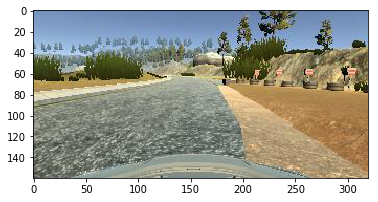

In [1]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Lambda,Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.models import load_model
import csv
import cv2
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
model=load_model('model3.h5')
im1=im.open("../data3/img/center_2017_11_05_15_24_34_196.jpg")
image_array = np.asarray(im1)
steering_angle = float(model.predict(image_array[None, :, :, :], batch_size=1))
print (steering_angle)
plt.imshow(im1)
plt.show()